# Incidence du syndrome de la varicelle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Afin d'éviter toute modification possible du jeu de données par le site du [Réseau Sentiennelle](https://www.sentiweb.fr/), nous allons télécharger le fichier de données et l'enregistrer en local si cela n'a pas été fait auparavant.

In [2]:
data_url = "https://www.sentiweb.fr/datasets/all/inc-7-PAY.csv"

In [6]:
file_name = "syndrome-varicelle.csv"

import os
import urllib.request
if not os.path.exists(file_name):
    urllib.request.urlretrieve(data_url, file_name)

Une lecture du fichier nous permet de voir que la première ligne est un commenantaire, nous la supprimons donc lors de l'importation des données (`skiprows=1`)

In [7]:
raw_data = pd.read_csv(data_url, encoding = 'iso-8859-1', skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202541          7   3740     1629    5851       6           3   
1     202540          7   2520      969    4071       4           2   
2     202539          7   3063     1367    4759       5           2   
3     202538          7   1195        0    2448       2           0   
4     202537          7   1120       11    2229       2           0   
5     202536          7   1575      320    2830       2           0   
6     202535          7   1327      162    2492       2           0   
7     202534          7   1438       48    2828       2           0   
8     202533          7   3579      692    6466       5           1   
9     202532          7   2384        0    4809       4           0   
10    202531          7   5703        0   13082       9           0   
11    202530          7   7102     3590   10614      11           6   
12    202529          7   6385     3384    9386      10           6   
13    202528          7   5584     3123    8045       8           4   
14    202527          7   5667     2850    8484       8           4   
15    202526          7   5872     3285    8459       9           5   
16    202525          7   5953     3698    8208       9           6   
17    202524          7   4580     2558    6602       7           4   
18    202523          7   4911     2663    7159       7           4   
19    202522          7   6837     3940    9734      10           6   
20    202521          7   4693     2653    6733       7           4   
21    202520          7   3083     1535    4631       5           3   
22    202519          7   5084     1997    8171       8           3   
23    202518          7   5003     2718    7288       7           4   
24    202517          7   6246     3424    9068       9           5   
25    202516          7   6151     3193    9109       9           5   
26    202515          7   5557     3262    7852       8           5   
27    202514          7   4984     2858    7110       7           4   
28    202513          7   5964     3608    8320       9           5   
29    202512          7   3855     1995    5715       6           3   
...      ...        ...    ...      ...     ...     ...         ...   
1789  199126          7  17608    11304   23912      31          20   
1790  199125          7  16169    10700   21638      28          18   
1791  199124          7  16171    10071   22271      28          17   
1792  199123          7  11947     7671   16223      21          13   
1793  199122          7  15452     9953   20951      27          17   
1794  199121          7  14903     8975   20831      26          16   
1795  199120          7  19053    12742   25364      34          23   
1796  199119          7  16739    11246   22232      29          19   
1797  199118          7  21385    13882   28888      38          25   
1798  199117          7  13462     8877   18047      24          16   
1799  199116          7  14857    10068   19646      26          18   
1800  199115          7  13975     9781   18169      25          18   
1801  199114          7  12265     7684   16846      22          14   
1802  199113          7   9567     6041   13093      17          11   
1803  199112          7  10864     7331   14397      19          13   
1804  199111          7  15574    11184   19964      27          19   
1805  199110          7  16643    11372   21914      29          20   
1806  199109          7  13741     8780   18702      24          15   
1807  199108          7  13289     8813   17765      23          15   
1808  199107          7  12337     8077   16597      22          15   
1809  199106          7  10877     7013   14741      19          12   
1810  199105          7  10442     6544   14340      18          11   
1811  199104          7   7913     4563   11263      14           8   
1812  199103          7  15387    10484   20290      27          18   
1813  199102          7  16277  

Nous vérifions que la base de données ne contient pas de ligne vide

In [8]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Les lignes sans données sont supprimées de la base de données de l'étude

In [9]:
data = raw_data.dropna().copy()
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202541          7   3740     1629    5851       6           3   
1     202540          7   2520      969    4071       4           2   
2     202539          7   3063     1367    4759       5           2   
3     202538          7   1195        0    2448       2           0   
4     202537          7   1120       11    2229       2           0   
5     202536          7   1575      320    2830       2           0   
6     202535          7   1327      162    2492       2           0   
7     202534          7   1438       48    2828       2           0   
8     202533          7   3579      692    6466       5           1   
9     202532          7   2384        0    4809       4           0   
10    202531          7   5703        0   13082       9           0   
11    202530          7   7102     3590   10614      11           6   
12    202529          7   6385     3384    9386      10           6   
13    202528          7   5584     3123    8045       8           4   
14    202527          7   5667     2850    8484       8           4   
15    202526          7   5872     3285    8459       9           5   
16    202525          7   5953     3698    8208       9           6   
17    202524          7   4580     2558    6602       7           4   
18    202523          7   4911     2663    7159       7           4   
19    202522          7   6837     3940    9734      10           6   
20    202521          7   4693     2653    6733       7           4   
21    202520          7   3083     1535    4631       5           3   
22    202519          7   5084     1997    8171       8           3   
23    202518          7   5003     2718    7288       7           4   
24    202517          7   6246     3424    9068       9           5   
25    202516          7   6151     3193    9109       9           5   
26    202515          7   5557     3262    7852       8           5   
27    202514          7   4984     2858    7110       7           4   
28    202513          7   5964     3608    8320       9           5   
29    202512          7   3855     1995    5715       6           3   
...      ...        ...    ...      ...     ...     ...         ...   
1789  199126          7  17608    11304   23912      31          20   
1790  199125          7  16169    10700   21638      28          18   
1791  199124          7  16171    10071   22271      28          17   
1792  199123          7  11947     7671   16223      21          13   
1793  199122          7  15452     9953   20951      27          17   
1794  199121          7  14903     8975   20831      26          16   
1795  199120          7  19053    12742   25364      34          23   
1796  199119          7  16739    11246   22232      29          19   
1797  199118          7  21385    13882   28888      38          25   
1798  199117          7  13462     8877   18047      24          16   
1799  199116          7  14857    10068   19646      26          18   
1800  199115          7  13975     9781   18169      25          18   
1801  199114          7  12265     7684   16846      22          14   
1802  199113          7   9567     6041   13093      17          11   
1803  199112          7  10864     7331   14397      19          13   
1804  199111          7  15574    11184   19964      27          19   
1805  199110          7  16643    11372   21914      29          20   
1806  199109          7  13741     8780   18702      24          15   
1807  199108          7  13289     8813   17765      23          15   
1808  199107          7  12337     8077   16597      22          15   
1809  199106          7  10877     7013   14741      19          12   
1810  199105          7  10442     6544   14340      18          11   
1811  199104          7   7913     4563   11263      14           8   
1812  199103          7  15387    10484   20290      27          18   
1813  199102          7  16277  

A l'aide de la librairie `isoweek`, nous allons convertir les dates au format iso 8601, en un format compréhensible par Pandas.

In [10]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [11]:
data['period']

0      2025-10-06/2025-10-12
1      2025-09-29/2025-10-05
2      2025-09-22/2025-09-28
3      2025-09-15/2025-09-21
4      2025-09-08/2025-09-14
5      2025-09-01/2025-09-07
6      2025-08-25/2025-08-31
7      2025-08-18/2025-08-24
8      2025-08-11/2025-08-17
9      2025-08-04/2025-08-10
10     2025-07-28/2025-08-03
11     2025-07-21/2025-07-27
12     2025-07-14/2025-07-20
13     2025-07-07/2025-07-13
14     2025-06-30/2025-07-06
15     2025-06-23/2025-06-29
16     2025-06-16/2025-06-22
17     2025-06-09/2025-06-15
18     2025-06-02/2025-06-08
19     2025-05-26/2025-06-01
20     2025-05-19/2025-05-25
21     2025-05-12/2025-05-18
22     2025-05-05/2025-05-11
23     2025-04-28/2025-05-04
24     2025-04-21/2025-04-27
25     2025-04-14/2025-04-20
26     2025-04-07/2025-04-13
27     2025-03-31/2025-04-06
28     2025-03-24/2025-03-30
29     2025-03-17/2025-03-23
                ...         
1789   1991-06-24/1991-06-30
1790   1991-06-17/1991-06-23
1791   1991-06-10/1991-06-16
1792   1991-06

Pour plus de lisibilité, nous trions les données par ordre chronologique selon la nouvelle base de date "Period"

In [12]:
sorted_data = data.set_index('period').sort_index()

Afin de vérifier la cohérence des données, nous évaluons la différence temporelle entre 2 périodes pour vérifier la continuité des données et l'absence possible de données. La différence temporelle est évaluée à la seconde près.

In [14]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Nous traçons l'ensemble des données sur un graphique

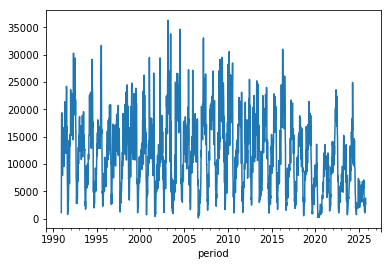

In [15]:
sorted_data['inc'].plot()

In [20]:
 first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

In [21]:
sorted_data

week  indicator    inc  inc_low  inc_up  inc100  \
period                                                                     
1990-12-03/1990-12-09  199049          7   1143        0    2610       2   
1990-12-10/1990-12-16  199050          7  11079     6660   15498      20   
1990-12-17/1990-12-23  199051          7  19080    13807   24353      34   
1990-12-24/1990-12-30  199052          7  19375    13295   25455      34   
1990-12-31/1991-01-06  199101          7  15565    10271   20859      27   
1991-01-07/1991-01-13  199102          7  16277    11046   21508      29   
1991-01-14/1991-01-20  199103          7  15387    10484   20290      27   
1991-01-21/1991-01-27  199104          7   7913     4563   11263      14   
1991-01-28/1991-02-03  199105          7  10442     6544   14340      18   
1991-02-04/1991-02-10  199106          7  10877     7013   14741      19   
1991-02-11/1991-02-17  199107          7  12337     8077   16597      22   
1991-02-18/1991-02-24  199108          7  13289     8813   17765      23   
1991-02-25/1991-03-03  199109          7  13741     8780   18702      24   
1991-03-04/1991-03-10  199110          7  16643    11372   21914      29   
1991-03-11/1991-03-17  199111          7  15574    11184   19964      27   
1991-03-18/1991-03-24  199112          7  10864     7331   14397      19   
1991-03-25/1991-03-31  199113          7   9567     6041   13093      17   
1991-04-01/1991-04-07  199114          7  12265     7684   16846      22   
1991-04-08/1991-04-14  199115          7  13975     9781   18169      25   
1991-04-15/1991-04-21  199116          7  14857    10068   19646      26   
1991-04-22/1991-04-28  199117          7  13462     8877   18047      24   
1991-04-29/1991-05-05  199118          7  21385    13882   28888      38   
1991-05-06/1991-05-12  199119          7  16739    11246   22232      29   
1991-05-13/1991-05-19  199120          7  19053    12742   25364      34   
1991-05-20/1991-05-26  199121          7  14903     8975   20831      26   
1991-05-27/1991-06-02  199122          7  15452     9953   20951      27   
1991-06-03/1991-06-09  199123          7  11947     7671   16223      21   
1991-06-10/1991-06-16  199124          7  16171    10071   22271      28   
1991-06-17/1991-06-23  199125          7  16169    10700   21638      28   
1991-06-24/1991-06-30  199126          7  17608    11304   23912      31   
...                       ...        ...    ...      ...     ...     ...   
2025-03-17/2025-03-23  202512          7   3855     1995    5715       6   
2025-03-24/2025-03-30  202513          7   5964     3608    8320       9   
2025-03-31/2025-04-06  202514          7   4984     2858    7110       7   
2025-04-07/2025-04-13  202515          7   5557     3262    7852       8   
2025-04-14/2025-04-20  202516          7   6151     3193    9109       9   
2025-04-21/2025-04-27  202517          7   6246     3424    9068       9   
2025-04-28/2025-05-04  202518          7   5003     2718    7288       7   
2025-05-05/2025-05-11  202519          7   5084     1997    8171       8   
2025-05-12/2025-05-18  202520          7   3083     1535    4631       5   
2025-05-19/2025-05-25  202521          7   4693     2653    6733       7   
2025-05-26/2025-06-01  202522          7   6837     3940    9734      10   
2025-06-02/2025-06-08  202523          7   4911     2663    7159       7   
2025-06-09/2025-06-15  202524          7   4580     2558    6602       7   
2025-06-16/2025-06-22  202525          7   5953     3698    8208       9   
2025-06-23/2025-06-29  202526          7   5872     3285    8459       9   
2025-06-30/2025-07-06  202527          7   5667     2850    8484       8   
2025-07-07/2025-07-13  202528          7   5584     3123    8045       8   
2025-07-14/2025-07-20  202529          7   6385     3384    9386      10   
2025-07-21/2025-07-27  202530          7   7102     3590   10614      11   
2025-07-28/2025-08-03  202531          7   5703        0   13082       9 

In [22]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

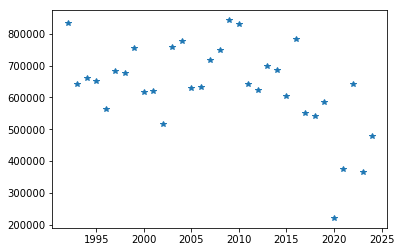

In [23]:
yearly_incidence.plot(style='*')

In [29]:
yearly_incidence

1992    832939
1993    643387
1994    661409
1995    652478
1996    564901
1997    683434
1998    677775
1999    756456
2000    617597
2001    619041
2002    516689
2003    758363
2004    777388
2005    628464
2006    632833
2007    717352
2008    749478
2009    842373
2010    829911
2011    642368
2012    624573
2013    698332
2014    685769
2015    604382
2016    782114
2017    551041
2018    542312
2019    584066
2020    221186
2021    376290
2022    641397
2023    366227
2024    479258
dtype: int64

In [30]:
indice_min = yearly_incidence.index(min())

TypeError: 'numpy.int64' object is not callable